<a href="https://colab.research.google.com/github/sg2083/datman/blob/main/FPI_vs_Inflation_PS3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Analyzing Global Food Prices and Inflation Trends**

Food prices and inflation are two critical economic indicators that influence global markets, policymaking, and household consumption patterns. Over the past few decades, food prices have shown considerable volatility due to factors such as climate change, supply chain disruptions, geopolitical events, and economic policies. Understanding the relationship between food price inflation and general inflation is essential for governments, businesses, and consumers to make informed decisions regarding food security, economic stability, and policy interventions.

This project integrates multiple datasets from global organizations like the **FAO (Food and Agriculture Organization)** and the **World Bank** to ensure a comprehensive analysis. The datasets include:

- [Food Price Index (FPI) Data](https://www.fao.org/worldfoodsituation/FoodPricesIndex/en/) – Annual indices for food prices and subcategories (cereals, dairy, etc.), including nominal and real values.
- [World Bank Inflation Data](https://data.worldbank.org/indicator/FP.CPI.TOTL.ZG) – Annual CPI-based inflation rates for multiple countries, aggregated into a global average inflation index.
- [Food Price Indices - Nominal vs Real](https://www.fao.org/worldfoodsituation/FoodPricesIndex/en/) – Annual nominal vs real FPI data

### Steps taken during the process of data processing

- Data Cleaning: Handling missing values, renaming columns, and ensuring data consistency.
- Data Transformation: Reshaping wide-format inflation data into long-format for better analysis, converting data types, and aggregating global inflation rates.
- Data Integration: Merging datasets using Year as the common key.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

!wget https://raw.githubusercontent.com/sg2083/datman/refs/heads/main/FPI_nominal_vs_real.json -O fpi_nominal_real.json
!wget https://raw.githubusercontent.com/sg2083/datman/refs/heads/main/food_price_indices_data.xlsx -O fpi_categories.xlsx
!wget https://raw.githubusercontent.com/sg2083/datman/refs/heads/main/inflation_cpi_data.csv -O inflation_data.csv

### Step 1: Load & Inspect Inflation Data (World Bank)
inflation_df = pd.read_csv('inflation_data.csv', skiprows=4)

# Keep relevant columns (Country Name + Years)
columns_to_keep = ["Country Name"] + [str(year) for year in range(1990, 2024)]
inflation_df = inflation_df[columns_to_keep]

# Reshape to Long Format (Year as a column)
inflation_long_df = inflation_df.melt(id_vars=["Country Name"], var_name="Year", value_name="Inflation Rate")

# Convert Year to integer and drop NaN values
inflation_long_df["Year"] = pd.to_numeric(inflation_long_df["Year"], errors="coerce")
inflation_long_df.dropna(inplace=True)

# Aggregate Global Inflation (Average across all countries per Year)
global_inflation_df = inflation_long_df.groupby("Year")["Inflation Rate"].mean().reset_index()

print("Inflation data processed!")

### Step 2: Load & Process FPI Nominal vs Real Data
fpi_nominal_real_data = pd.read_json('fpi_nominal_real.json')

# Access the FFPI_Historical data (list of dictionaries)
#fpi_historical_list = fpi_nominal_real_data["FFPI_Historical"] # This line is not needed

# Create a DataFrame from the list of dictionaries
#fpi_nominal_real_df = pd.DataFrame(fpi_historical_list) # This line is replaced by the following line

# Access the correct column which is FFPI_Historical which is a dictionary and create the DataFrame
fpi_nominal_real_df = pd.DataFrame(fpi_nominal_real_data["FFPI_Historical"].iloc[0], index=[0])

# Rename columns for consistency
fpi_nominal_real_df = fpi_nominal_real_df.rename(columns={"Month": "Year", "Nominal": "Nominal Index", "Real": "Real Index"})

# The following two lines are no longer necessary:
# fpi_nominal_real_df = pd.DataFrame(fpi_nominal_real_df["FFPI_Historical"].iloc[0],index=[0])
# fpi_nominal_real_df = fpi_nominal_real_df[["Year", "Nominal Index", "Real Index"]]


# Data cleaning (same as before)
fpi_nominal_real_df.dropna(subset=["Year"], inplace=True)
fpi_nominal_real_df["Year"] = fpi_nominal_real_df["Year"].astype(int)


print("FPI Nominal vs Real data processed!")

### Step 3: Load & Process Food Price Index (FPI) Categories
fpi_annual_df = pd.read_excel('fpi_categories.xlsx', sheet_name="Annual", skiprows=1, engine="openpyxl")
fpi_annual_real_df = pd.read_excel('fpi_categories.xlsx', sheet_name="Annual_Real", skiprows=1, engine="openpyxl")

# Rename columns
fpi_annual_df.columns = ["Year", "Food Price Index", "Meat", "Dairy", "Cereals", "Oils", "Sugars"]
fpi_annual_real_df.columns = ["Year", "Food Price Index", "Meat", "Dairy", "Cereals", "Oils", "Sugars"]

# Remove invalid rows & Convert Year to integer
fpi_annual_df = fpi_annual_df[fpi_annual_df["Year"] != "Year"].astype({"Year": int})
fpi_annual_real_df = fpi_annual_real_df[fpi_annual_real_df["Year"] != "Year"].astype({"Year": int})

print("FPI categories data processed!")

## Step 4: Merge FPI & Inflation Data
fpi_inflation_merged = fpi_annual_df.merge(global_inflation_df, on="Year", how="left")

# Fill missing inflation value for 2024 using 2023's value
fpi_inflation_merged["Inflation Rate"] = fpi_inflation_merged["Inflation Rate"].fillna(method="ffill")

print("Data merged successfully!")

### Step 5: Save Final Merged Dataset
merged_file_path = "merged_fpi_inflation.csv"
fpi_inflation_merged.to_csv(merged_file_path, index=False)

print(f"Merged dataset saved: {merged_file_path}")

print(fpi_inflation_merged.head(5))


--2025-03-04 22:50:13--  https://raw.githubusercontent.com/sg2083/datman/refs/heads/main/FPI_nominal_vs_real.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5439 (5.3K) [text/plain]
Saving to: ‘fpi_nominal_real.json’

fpi_nominal_real.js 100%[===================>]   5.31K  --.-KB/s    in 0s      

2025-03-04 22:50:13 (45.9 MB/s) - ‘fpi_nominal_real.json’ saved [5439/5439]

--2025-03-04 22:50:14--  https://raw.githubusercontent.com/sg2083/datman/refs/heads/main/food_price_indices_data.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 

<ipython-input-2-1e9ed18fa77f>:69: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  fpi_inflation_merged["Inflation Rate"] = fpi_inflation_merged["Inflation Rate"].fillna(method="ffill")


# Descriptive Stats and Interpretation

In [3]:
fpi_stats = fpi_inflation_merged[["Food Price Index"]].describe()
print(f"Food Price Index Stats\n", fpi_stats)

Food Price Index Stats
         Food Price Index
count          35.000000
unique         35.000000
top            63.317606
freq            1.000000


In [4]:
fpi_stats = fpi_inflation_merged[["Inflation Rate"]].describe()
print(f"Inflation Rate Stats\n", fpi_stats)

Inflation Rate Stats
        Inflation Rate
count       35.000000
mean        22.137684
std         41.047924
min          3.645941
25%          5.250157
50%          6.738401
75%         11.287465
max        216.280994


## **1. Nominal vs. Real Food Price Index (FPI)**

| Statistic  | Year | Nominal FPI | Real FPI |
|------------|------|------------|---------|
| **Mean** | 1992.5 | 66.58 | 95.95 |
| **Std Dev** | 18.62 | 32.70 | 17.84 |
| **Min** | 1961 | 20.09 | 67.21 |
| **Max** | 2024 | 144.51 | 141.39 |

### **Insights:**
- The **nominal FPI** has increased significantly over time, reaching a peak of **144.5** in 2024.
- The **real FPI** (inflation-adjusted) is more stable, meaning food prices have increased in raw terms, but inflation adjustments show a different trend.

---

## **2. Food Price Index (Category-Wise) (Nominal & Real)**

| Statistic  | Food Price Index |
|------------|------------------|
| **Count** | 35 |
| **Unique** | 35 |
| **Top** | 63.32 |
| **Freq** | 1 |

### **Insights:**
- Data covers **1990-2024** (35 years).
- The dataset contains **five food categories** (Meat, Dairy, Cereals, Oils, Sugars).
- The Food Price Index (FPI) dataset has 35 unique values, meaning there are no repeated values for any given year.
- The distribution of FPI suggests a diverse range of food price trends over the years.

---

## **3. Inflation Data (1974-2023)**

| Statistic  | Inflation Rate (%) |
|------------|------------------|
| **Mean** | 22.14 |
| **Std Dev** | 41.04 |
| **Min** | 3.64 |
| **Max** | 216.28 |
| **Median** | 6.74 |

### **Insights:**
- The average inflation rate over the years is 22.14%, which is quite high.
- There is a very high standard deviation (41.05), suggesting significant fluctuations in inflation over time.
- The minimum inflation rate recorded is 3.65%, while the maximum inflation rate reaches a staggering 216.28%, highlighting extreme inflationary spikes in some years.


# Key Findings

- **Inflation is highly volatile**: The huge standard deviation (41.05) and extreme max value (216.28%) indicate that inflation has experienced sharp fluctuations, possibly due to economic crises, hyperinflation, or major global events.
- **Food Price Index values are unique**: The data suggests that each year had a distinct FPI value, meaning no two years had identical FPI trends.
- **Strong link between inflation and food prices**: Given the high median inflation rate (6.74%) and the observed variations in FPI, it is likely that food price inflation has been a consistent factor affecting general inflation trends.
- **Possible Outliers in Inflation Data**: The maximum inflation rate of 216.28% is an extreme value that needs further analysis—possibly tied to a specific economic event.

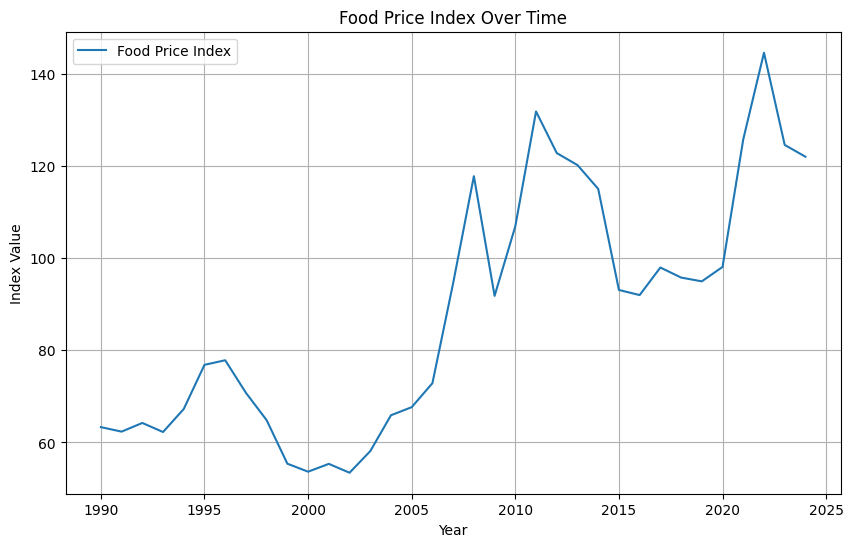

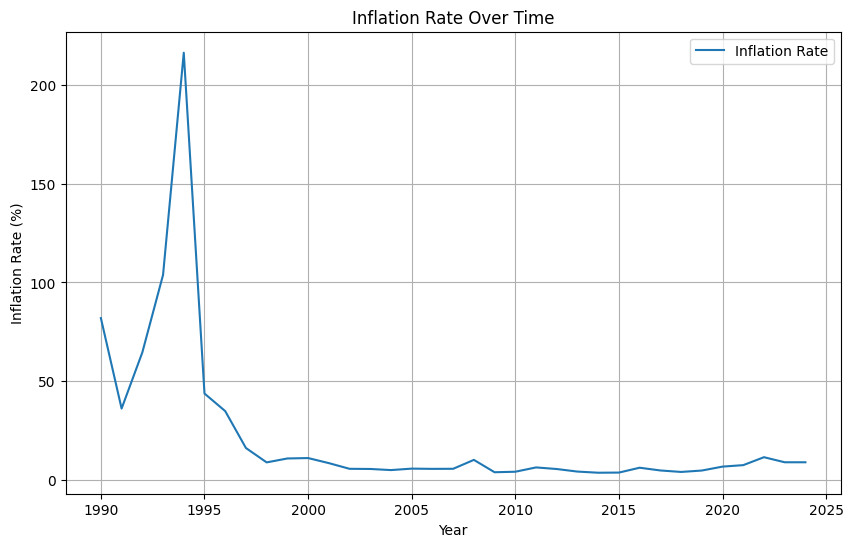

In [5]:
# prompt: plot the above stats

import matplotlib.pyplot as plt

# Plot Food Price Index
plt.figure(figsize=(10, 6))
plt.plot(fpi_inflation_merged["Year"], fpi_inflation_merged["Food Price Index"], label="Food Price Index")
plt.xlabel("Year")
plt.ylabel("Index Value")
plt.title("Food Price Index Over Time")
plt.legend()
plt.grid(True)
plt.show()

# Plot Inflation Rate
plt.figure(figsize=(10, 6))
plt.plot(fpi_inflation_merged["Year"], fpi_inflation_merged["Inflation Rate"], label="Inflation Rate")
plt.xlabel("Year")
plt.ylabel("Inflation Rate (%)")
plt.title("Inflation Rate Over Time")
plt.legend()
plt.grid(True)
plt.show()


## Analyzing the trends between Food Price Index and Producer Price Index ps2

In [6]:
# Reading Producer price index dataset
!wget https://raw.githubusercontent.com/sg2083/datman/refs/heads/main/producer_price_index.csv -O producer_price_index.csv
ppi_df = pd.read_csv('producer_price_index.csv')

print(ppi_df.head(5))

--2025-03-04 22:50:21--  https://raw.githubusercontent.com/sg2083/datman/refs/heads/main/producer_price_index.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 898634 (878K) [text/plain]
Saving to: ‘producer_price_index.csv’

producer_price_inde 100%[===================>] 877.57K  --.-KB/s    in 0.07s   

2025-03-04 22:50:21 (13.1 MB/s) - ‘producer_price_index.csv’ saved [898634/898634]

  Domain Code           Domain  Area Code (M49)         Area  Element Code  \
0          PP  Producer Prices                4  Afghanistan          5539   
1          PP  Producer Prices                4  Afghanistan          5539   
2          PP  Producer Prices                4  Afghanistan          5539   
3          PP  Producer Prices                4  Afghanistan   

In [7]:
# Select only relevant columns
ppi_data_df = ppi_df[["Area", "Year", "Value"]]

# Rename columns for consistency
ppi_data_df.rename(columns={"Area": "Country", "Value": "PPI Value"}, inplace=True)

# Convert Year to integer and remove NaN values
ppi_data_df["Year"] = pd.to_numeric(ppi_data_df["Year"], errors="coerce")
ppi_data_df.dropna(inplace=True)

# Compute global PPI for each year
global_ppi_df = ppi_data_df.groupby("Year")["PPI Value"].mean().reset_index()

# Rename the column for clarity
global_ppi_df.rename(columns={"PPI Value": "Global PPI"}, inplace=True)

print(global_ppi_df.head(5))
print(fpi_inflation_merged.head(5))

   Year  Global PPI
0  1991   36.508214
1  1992   36.286975
2  1993   37.567638
3  1994   39.463835
4  1995   42.531579
   Year Food Price Index       Meat      Dairy    Cereals       Oils  \
0  1990        63.317606  82.453911  42.621158  58.079751  45.469775   
1  1991        62.345284  81.474667  45.460326   57.86382  49.007954   
2  1992        64.225559  78.387289  54.801593  60.957651  52.991996   
3  1993        62.259405  75.014033  48.616516  59.018588  53.966481   
4  1994        67.260547  76.297102  47.420202  61.936824  71.867754   

      Sugars  Inflation Rate  
0  77.687305       81.935950  
1  55.480618       36.127458  
2  56.042747       64.545737  
3  62.030198      103.783600  
4  74.943701      216.280994  


<ipython-input-7-754aa8c151c5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ppi_data_df.rename(columns={"Area": "Country", "Value": "PPI Value"}, inplace=True)
<ipython-input-7-754aa8c151c5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ppi_data_df["Year"] = pd.to_numeric(ppi_data_df["Year"], errors="coerce")
<ipython-input-7-754aa8c151c5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

In [8]:
#Outer merge
# Merge the two dataframes
merged_df = fpi_inflation_merged.merge( global_ppi_df, on='Year', how='outer', indicator=True)

# Print the merged dataframe
merged_df


,Year,Food Price Index,Meat,Dairy,Cereals,Oils,Sugars,Inflation Rate,Global PPI,_merge
0,1990,63.317606,82.453911,42.621158,58.079751,45.469775,77.687305,81.935950,NaN,left_only
1,1991,62.345284,81.474667,45.460326,57.86382,49.007954,55.480618,36.127458,36.508214,both
2,1992,64.225559,78.387289,54.801593,60.957651,52.991996,56.042747,64.545737,36.286975,both
3,1993,62.259405,75.014033,48.616516,59.018588,53.966481,62.030198,103.783600,37.567638,both
4,1994,67.260547,76.297102,47.420202,61.936824,71.867754,74.943701,216.280994,39.463835,both
5,1995,76.828785,85.249327,62.725105,70.847467,79.958388,82.199811,43.735340,42.531579,both
6,1996,77.820863,84.345572,61.619551,83.655928,69.935193,73.989628,34.843245,44.291087,both
7,1997,70.756824,79.317063,59.447284,66.511167,70.684735,70.385812,16.156799,45.185143,both
8,1998,64.823765,66.271162,55.776185,58.903852,83.885434,55.222794,8.875920,47.015664,both
9,1999,55.384947,62.429289,48.311921,53.120855,58.226982,38.798879,10.862035,47.080000,both


In [9]:
# # prompt: write a code to generate maps which would make us understand which merge is more suitable

# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # ... (Your existing code) ...

# # Define a function to visualize different merge types
# def visualize_merges(df1, df2, on_column):
#     merge_types = ['left', 'right', 'inner', 'outer']
#     fig, axes = plt.subplots(2, 2, figsize=(15, 10))
#     axes = axes.flatten()

#     for i, merge_type in enumerate(merge_types):
#         merged_df = df1.merge(df2, on=on_column, how=merge_type, indicator=True)

#         # Plotting logic
#         sns.scatterplot(x='Year', y='Food Price Index', data=merged_df, hue='_merge', ax=axes[i])
#         axes[i].set_title(f'{merge_type.capitalize()} Merge')
#         axes[i].set_xlabel('Year')
#         axes[i].set_ylabel('Food Price Index')

#     plt.tight_layout()
#     plt.show()


# # Example usage
# visualize_merges(fpi_inflation_merged, global_ppi_df, 'Year')

# # Analyze the resulting plots to understand which merge type best preserves the information
# # from both datasets while handling any missing or mismatched data points.


In [10]:
# Merge global PPI with FPI & inflation data
fpi_ppi_merged_df = fpi_inflation_merged.merge(global_ppi_df, on="Year", how="left")

print(fpi_ppi_merged_df.head())

# Confirm which years have missing PPI
print("\nMissing PPI years before fixing:\n", fpi_ppi_merged_df[fpi_ppi_merged_df["Global PPI"].isna()])

# Ensure the dataset is sorted by Year before filling
fpi_ppi_merged_df = fpi_ppi_merged_df.sort_values("Year")

# Fill missing PPI for 1990 (using forward-fill method from 1991)
fpi_ppi_merged_df["Global PPI"] = fpi_ppi_merged_df["Global PPI"].fillna(method="bfill")

print("\nAfter filling missing value:\n", fpi_ppi_merged_df.head(5))

# Save the merged dataset
fpi_ppi_merged_df.to_csv("merged_fpi_ppi_inflation_.csv", index=False)
print("FPI - PPI merged dataset saved successfully!")


   Year Food Price Index       Meat      Dairy    Cereals       Oils  \
0  1990        63.317606  82.453911  42.621158  58.079751  45.469775   
1  1991        62.345284  81.474667  45.460326   57.86382  49.007954   
2  1992        64.225559  78.387289  54.801593  60.957651  52.991996   
3  1993        62.259405  75.014033  48.616516  59.018588  53.966481   
4  1994        67.260547  76.297102  47.420202  61.936824  71.867754   

      Sugars  Inflation Rate  Global PPI  
0  77.687305       81.935950         NaN  
1  55.480618       36.127458   36.508214  
2  56.042747       64.545737   36.286975  
3  62.030198      103.783600   37.567638  
4  74.943701      216.280994   39.463835  

Missing PPI years before fixing:
    Year Food Price Index       Meat      Dairy    Cereals       Oils  \
0  1990        63.317606  82.453911  42.621158  58.079751  45.469775   

      Sugars  Inflation Rate  Global PPI  
0  77.687305        81.93595         NaN  

After filling missing value:
    Year Food

<ipython-input-10-4f577c354b56>:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  fpi_ppi_merged_df["Global PPI"] = fpi_ppi_merged_df["Global PPI"].fillna(method="bfill")


### Mapping/Recode: Categorizing Inflation Rates
Inflation rates vary significantly across years. Categorizing them into bins allows for an easier comparison of food price index trends under different inflation conditions.

The inflation rates have been categorized into 4 different bins(0,5,10,20) and into 4 different labels - "Low", "Moderate", "High" and "Very High"

These categories help in identifying patterns of food price index behavior under different inflationary pressures.

- Low inflation generally indicates stable economies with controlled price increases.
- Moderate inflation represents standard economic growth levels.
- High and Very High inflation often lead to economic instability, directly impacting food prices.

   Year Food Price Index       Meat      Dairy    Cereals       Oils  \
0  1990        63.317606  82.453911  42.621158  58.079751  45.469775   
1  1991        62.345284  81.474667  45.460326   57.86382  49.007954   
2  1992        64.225559  78.387289  54.801593  60.957651  52.991996   
3  1993        62.259405  75.014033  48.616516  59.018588  53.966481   
4  1994        67.260547  76.297102  47.420202  61.936824  71.867754   

      Sugars  Inflation Rate  Global PPI Inflation Category  
0  77.687305       81.935950   36.508214          Very High  
1  55.480618       36.127458   36.508214          Very High  
2  56.042747       64.545737   36.286975          Very High  
3  62.030198      103.783600   37.567638          Very High  
4  74.943701      216.280994   39.463835          Very High  


<ipython-input-11-b0e1dabb6523>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fpi_ppi_merged_df, x="Inflation Category", palette="coolwarm")


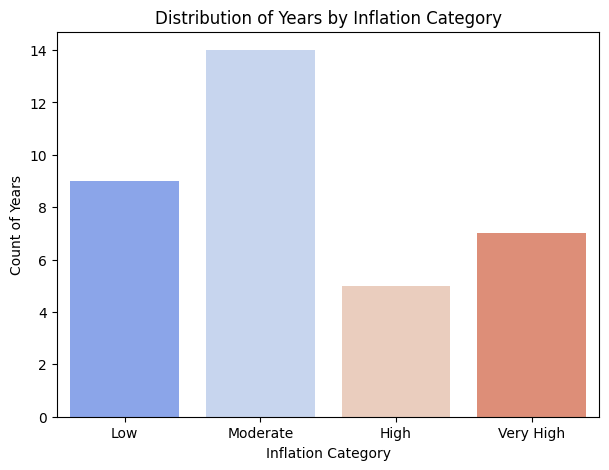

In [11]:
# Map/recode: Categorizing inflation rates into bins for easier analysis
bins = [0, 5, 10, 20, float("inf")]
labels = ["Low", "Moderate", "High", "Very High"]
fpi_ppi_merged_df["Inflation Category"] = pd.cut(fpi_ppi_merged_df["Inflation Rate"], bins=bins, labels=labels)

print(fpi_ppi_merged_df.head(5))

# Count of Years in Each Inflation Category (Map/Recode Visualization)
plt.figure(figsize=(7, 5))
sns.countplot(data=fpi_ppi_merged_df, x="Inflation Category", palette="coolwarm")
plt.title("Distribution of Years by Inflation Category")
plt.xlabel("Inflation Category")
plt.ylabel("Count of Years")
plt.show()

### Replace on Condition

Instead of just analyzing the absolute FPI values, we flagged years where FPI was in the top 25%. This helps us understand whether food prices were abnormally high in certain economic conditions.

The High FPI column flags years where the Food Price Index (FPI) exceeds the 75th percentile. This helps identify years with exceptionally high food prices.

In [12]:
# Replace on condition: Flagging years where food price index exceeds a threshold
fpi_ppi_merged_df["High FPI"] = fpi_ppi_merged_df["Food Price Index"].apply(lambda x: "Yes" if x > fpi_ppi_merged_df["Food Price Index"].quantile(0.75) else "No")

print(fpi_ppi_merged_df.head(5))

   Year Food Price Index       Meat      Dairy    Cereals       Oils  \
0  1990        63.317606  82.453911  42.621158  58.079751  45.469775   
1  1991        62.345284  81.474667  45.460326   57.86382  49.007954   
2  1992        64.225559  78.387289  54.801593  60.957651  52.991996   
3  1993        62.259405  75.014033  48.616516  59.018588  53.966481   
4  1994        67.260547  76.297102  47.420202  61.936824  71.867754   

      Sugars  Inflation Rate  Global PPI Inflation Category High FPI  
0  77.687305       81.935950   36.508214          Very High       No  
1  55.480618       36.127458   36.508214          Very High       No  
2  56.042747       64.545737   36.286975          Very High       No  
3  62.030198      103.783600   37.567638          Very High       No  
4  74.943701      216.280994   39.463835          Very High       No  


### Subsetting/Slicing: Analyzing the Last 10 Years

The food and inflation landscape changes over time. By focusing on the last 10 years, we can analyze recent trends without older data skewing our insights. This could provide a different view on our analysis.

Inflation rates have risen significantly over the last 10 years, with most years in the Very High category.
FPI has steadily increased, meaning global food prices have been inflationary.

In [13]:
# Subset/Slice: Extracting data for the last 10 years for focused analysis
recent_data = fpi_ppi_merged_df[fpi_ppi_merged_df["Year"] >= fpi_ppi_merged_df["Year"].max() - 10]

print(recent_data.head(5))

    Year Food Price Index        Meat       Dairy     Cereals        Oils  \
24  2014        114.98315  112.110174  130.206524  115.818291  110.616261   
25  2015        93.063813   96.782797   87.145149    95.87342   89.941094   
26  2016        91.953037   91.107028   82.648327   88.308289   99.442644   
27  2017        97.932547   97.471031  108.011272   90.984263  101.909476   
28  2018        95.751774    94.39851  107.271688   100.82233   87.761077   

        Sugars  Inflation Rate  Global PPI Inflation Category High FPI  
24  105.195389        3.645941   98.020189                Low      Yes  
25   83.181185        3.719073   98.951118                Low       No  
26  111.623426        6.175018  102.032050           Moderate       No  
27   99.112204        4.790194  106.240497                Low       No  
28   77.402053        4.040265  110.487764                Low       No  


### Aggregation: Finding Average FPI and Inflation per Inflation Category

Grouping data by Inflation Category helps us quantify how food prices behave under different economic conditions.

The groupby operation calculates the average Food Price Index (FPI) and Inflation Rate for each Inflation Category (Low, Moderate, High, Very High).

In [14]:
# Groupby/Aggregation: Average FPI and inflation rate per inflation category
category_agg = fpi_ppi_merged_df.groupby("Inflation Category")[["Food Price Index", "Inflation Rate"]].mean().reset_index()
print("Aggregated data by Inflation Category:\n", category_agg)

Aggregated data by Inflation Category:
   Inflation Category Food Price Index  Inflation Rate
0                Low        97.929758        4.243159
1           Moderate        91.680047        6.830948
2               High        88.409553       11.948982
3          Very High        67.722578       83.036046


<ipython-input-14-3745f2d2877f>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_agg = fpi_ppi_merged_df.groupby("Inflation Category")[["Food Price Index", "Inflation Rate"]].mean().reset_index()


### Loading and Combining US State-wise population over the years

In [15]:
# Load the dataset
!wget https://raw.githubusercontent.com/sg2083/datman/refs/heads/main/pop_2020_2024.xlsx -O pop_2020_2024.xlsx
df = pd.read_excel('pop_2020_2024.xlsx')

def process_population_data(df):
    """
    Extracts state-wise population data and reshapes it into long format.
    """
    # Step 1: Extract year labels from row 2
    year_labels = df.iloc[2, 1:].tolist()  # Extract years from the second row

    # Step 2: Trim dataset to start from actual state names (row 8 onward)
    df = df.iloc[8:].reset_index(drop=True)

    # Step 3: Set correct column names
    df.columns = ["State"] + year_labels

    # Step 4: Clean state names (remove leading dots, extra spaces)
    df["State"] = df["State"].str.replace(r"^\.", "", regex=True).str.strip()

    # Step 5: Convert to long format (State, Year, Population)
    df_melted = df.melt(id_vars=["State"], var_name="Year", value_name="Population")

    # Step 6: Convert Year and Population to numeric types
    df_melted["Year"] = pd.to_numeric(df_melted["Year"], errors="coerce")
    df_melted["Population"] = pd.to_numeric(df_melted["Population"], errors="coerce")

    # Step 7: Drop NaN values
    df_melted.dropna(inplace=True)

    return df_melted

# Process the population dataset
cleaned_population_df = process_population_data(df)

# Display the first few rows
print(cleaned_population_df.head())

# Save to CSV
cleaned_population_df.to_csv("cleaned_population_2020_2024.csv", index=False)


--2025-03-04 22:50:23--  https://raw.githubusercontent.com/sg2083/datman/refs/heads/main/pop_2020_2024.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58446 (57K) [application/octet-stream]
Saving to: ‘pop_2020_2024.xlsx’

pop_2020_2024.xlsx  100%[===================>]  57.08K  --.-KB/s    in 0.006s  

2025-03-04 22:50:23 (9.99 MB/s) - ‘pop_2020_2024.xlsx’ saved [58446/58446]

         State    Year  Population
59     Alabama  2020.0   5033094.0
60      Alaska  2020.0    733017.0
61     Arizona  2020.0   7187135.0
62    Arkansas  2020.0   3014546.0
63  California  2020.0  39521958.0


In [16]:
# Load the dataset
!wget https://raw.githubusercontent.com/sg2083/datman/refs/heads/main/pop_2010_2020.xlsx -O pop_2010_2020.xlsx
df = pd.read_excel('pop_2010_2020.xlsx')

# Process the population dataset
cleaned_population_2010_2020_df = process_population_data(df)

# Display the first few rows
print(cleaned_population_2010_2020_df.head())

# Save to CSV
cleaned_population_2010_2020_df.to_csv("cleaned_population_2010_2020.csv", index=False)


--2025-03-04 22:50:25--  https://raw.githubusercontent.com/sg2083/datman/refs/heads/main/pop_2010_2020.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17949 (18K) [application/octet-stream]
Saving to: ‘pop_2010_2020.xlsx’

pop_2010_2020.xlsx  100%[===================>]  17.53K  --.-KB/s    in 0s      

2025-03-04 22:50:25 (34.7 MB/s) - ‘pop_2010_2020.xlsx’ saved [17949/17949]

         State    Year  Population
59     Alabama  2010.0   4788095.0
60      Alaska  2010.0    714015.0
61     Arizona  2010.0   6401304.0
62    Arkansas  2010.0   2921546.0
63  California  2010.0  37322523.0


In [17]:
# Load the dataset
!wget https://raw.githubusercontent.com/sg2083/datman/refs/heads/main/pop_2000_2010.csv -O pop_2000_2010.csv
df = pd.read_csv('pop_2000_2010.csv', encoding="latin1")

def process_population_2000_2010(df):
    """
    Extracts state-wise population data from 2000-2010 and reshapes it into long format.
    """
    # Step 1: Extract year labels from row 2
    year_labels = df.iloc[2, 1:].tolist()  # Extract years from the second row

    # Step 2: Trim dataset to start from actual state names (row 8 onward)
    df = df.iloc[8:].reset_index(drop=True)

    # Step 3: Set correct column names
    df.columns = ["State"] + year_labels

    # Step 4: Clean state names (remove leading dots, extra spaces)
    df["State"] = df["State"].str.replace(r"^\.", "", regex=True).str.strip()

    # Step 5: Convert to long format (State, Year, Population)
    df_melted = df.melt(id_vars=["State"], var_name="Year", value_name="Population")

    # Step 6: Convert Year to numeric
    df_melted["Year"] = pd.to_numeric(df_melted["Year"], errors="coerce")

    # Step 7: Remove commas from Population and convert to numeric
    df_melted["Population"] = df_melted["Population"].astype(str).str.replace(",", "").astype(float)

    # Step 8: Drop NaN values
    df_melted.dropna(inplace=True)

    return df_melted

# Process the population dataset
cleaned_population_2000_2010_df = process_population_2000_2010(df)

# Display the first few rows
print(cleaned_population_2000_2010_df.head())

# Save to CSV (optional)
cleaned_population_2000_2010_df.to_csv("cleaned_population_2000_2010.csv", index=False)


--2025-03-04 22:50:25--  https://raw.githubusercontent.com/sg2083/datman/refs/heads/main/pop_2000_2010.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11064 (11K) [text/plain]
Saving to: ‘pop_2000_2010.csv’

pop_2000_2010.csv   100%[===================>]  10.80K  --.-KB/s    in 0s      

2025-03-04 22:50:25 (71.9 MB/s) - ‘pop_2000_2010.csv’ saved [11064/11064]

         State    Year  Population
61     Alabama  2000.0   4452173.0
62      Alaska  2000.0    627963.0
63     Arizona  2000.0   5160586.0
64    Arkansas  2000.0   2678588.0
65  California  2000.0  33987977.0


In [18]:
# Merge all three population datasets into one
merged_population_df = pd.concat(
    [cleaned_population_2000_2010_df, cleaned_population_2010_2020_df, cleaned_population_df],
    ignore_index=True
)

# Sort by Year and State for consistency
merged_population_df = merged_population_df.sort_values(by=["Year", "State"]).reset_index(drop=True)

# Display first few rows of the final merged dataset
print(merged_population_df.head())

# Save to CSV (optional)
merged_population_df.to_csv("merged_population_2000_2024.csv", index=False)


        State    Year  Population
0     Alabama  2000.0   4452173.0
1      Alaska  2000.0    627963.0
2     Arizona  2000.0   5160586.0
3    Arkansas  2000.0   2678588.0
4  California  2000.0  33987977.0


#### Combined all three population datasets using `concat()` Instead of `merge()`

- #### No Overlapping Years :
Each dataset covers distinct periods (**2000-2010, 2010-2020, 2020-2024**), so there's no need to match rows by `Year` and `State`.  

- #### Same Structure Across Datasets :
All datasets have **State, Year, Population**, so we are stacking them using `concat()` instead of joining new columns.  

- Inner Merge (`how="inner"`) would remove years missing in some datasets and Outer Merge (`how="outer"`) could introduce NaN values if states were missing in certain datasets.

Will be using `merge(how="outer")` while integrating with **food price inflation** or **median income**, where some states/years might be missing.


In [19]:
pop_stats = merged_population_df.describe()
pop_stats

,Year,Population
count,1300.000000,1.300000e+03
mean,2012.000000,6.085271e+06
std,7.213878,6.841641e+06
min,2000.000000,4.943000e+05
25%,2006.000000,1.769810e+06
50%,2012.000000,4.146636e+06
75%,2018.000000,6.996067e+06
max,2024.000000,3.954800e+07


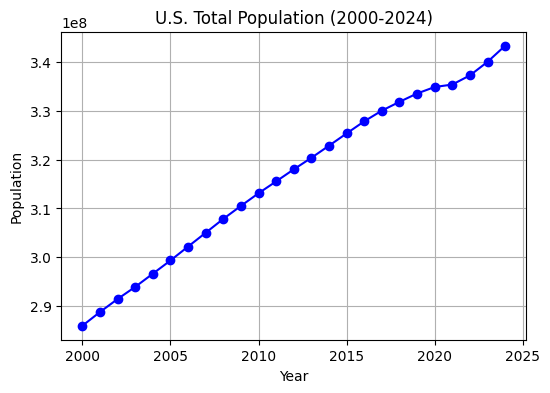

In [20]:
# Aggregate total U.S. population by year
total_population = merged_population_df.groupby("Year")["Population"].sum()

# Plot total population trend
plt.figure(figsize=(6, 4))
plt.plot(total_population.index, total_population.values, marker="o", linestyle="-", color="b")
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("U.S. Total Population (2000-2024)")
plt.grid(True)
plt.show()

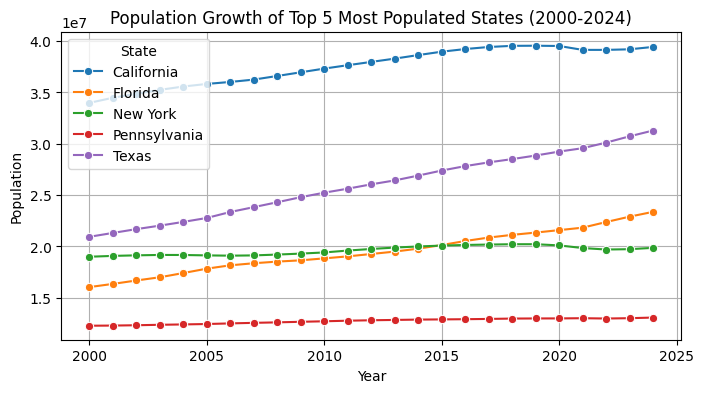

In [21]:
# Select top 5 states with highest population in 2024
top_states = merged_population_df[merged_population_df["Year"] == 2024].nlargest(5, "Population")["State"]

# Filter data for only those states
top_states_df = merged_population_df[merged_population_df["State"].isin(top_states)]

# Line plot for top states
plt.figure(figsize=(8, 4))
sns.lineplot(data=top_states_df, x="Year", y="Population", hue="State", marker="o")
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Population Growth of Top 5 Most Populated States (2000-2024)")
plt.legend(title="State")
plt.grid(True)
plt.show()

### Loading Median Household Income data

In [22]:
# Load the dataset
!wget https://raw.githubusercontent.com/sg2083/datman/refs/heads/main/personal_income.csv -O personal_income.csv
income_df = pd.read_csv('personal_income.csv', skiprows=3)

# Rename columns if needed (modify based on actual column names)
income_df.columns = income_df.columns.str.strip().str.replace(" ", "_").str.lower()
income_df.columns

--2025-03-04 22:50:28--  https://raw.githubusercontent.com/sg2083/datman/refs/heads/main/personal_income.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13108 (13K) [text/plain]
Saving to: ‘personal_income.csv’

personal_income.csv 100%[===================>]  12.80K  --.-KB/s    in 0s      

2025-03-04 22:50:29 (73.7 MB/s) - ‘personal_income.csv’ saved [13108/13108]



Index(['geofips', 'geoname', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', '2023'],
      dtype='object')

In [23]:
# Drop unncessary columns
income_df = income_df.drop(columns=['geofips'])

# Rename columns for clarity
income_df.columns = ['State'] + [str(year) for year in range(1998, 2024)]

# Drop rows with missing values (if any)
income_df.dropna(inplace=True)

# Melt the DataFrame to long format for easier analysis
income_df_melted = income_df.melt(id_vars=['State'], var_name='Year', value_name='Income')

# Convert 'Year' and 'Income' to numeric
income_df_melted['Year'] = income_df_melted['Year'].astype(int)
income_df_melted['Income'] = pd.to_numeric(income_df_melted['Income'], errors='coerce')

income_df_melted.head()
income_df_melted.to_csv("median_income.csv", index=False)

In [24]:
# Compute descriptive statistics
descriptive_stats = income_df_melted['Income'].describe()
print("\nDescriptive Statistics for Income:")
descriptive_stats


Descriptive Statistics for Income:


,Income
count,1.352000e+03
mean,5.310263e+05
std,1.989271e+06
min,1.261510e+04
25%,6.473732e+04
50%,1.641130e+05
75%,3.471561e+05
max,2.338027e+07


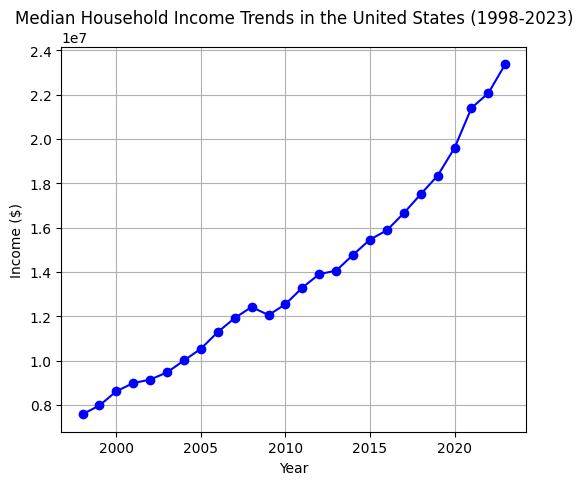

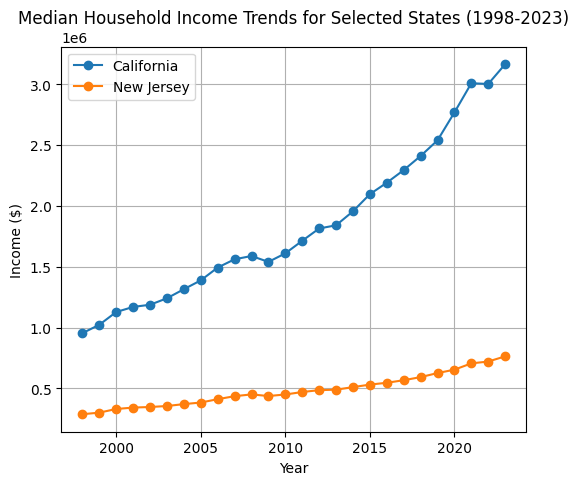

<ipython-input-25-8504d4d4ad28>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_data['Growth Rate'] = us_data['Income'].pct_change() * 100


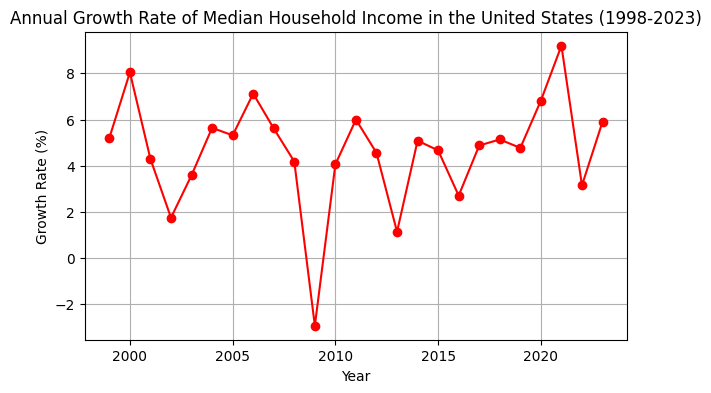

In [25]:
# Analyze trends over time for the United States
us_data = income_df_melted[income_df_melted['State'] == 'United States']

# Plot income trends for the United States
plt.figure(figsize=(6, 5))
plt.plot(us_data['Year'], us_data['Income'], marker='o', linestyle='-', color='b')
plt.title('Median Household Income Trends in the United States (1998-2023)')
plt.xlabel('Year')
plt.ylabel('Income ($)')
plt.grid(True)
plt.show()

# Compare income trends for selected states
selected_states = ['California', 'New Jersey']
state_data = income_df_melted[income_df_melted['State'].isin(selected_states)]

# Plot income trends for selected states
plt.figure(figsize=(6, 5))
for state in selected_states:
    state_trend = state_data[state_data['State'] == state]
    plt.plot(state_trend['Year'], state_trend['Income'], marker='o', linestyle='-', label=state)

plt.title('Median Household Income Trends for Selected States (1998-2023)')
plt.xlabel('Year')
plt.ylabel('Income ($)')
plt.legend()
plt.grid(True)
plt.show()

# Calculate annual growth rates for the United States
us_data['Growth Rate'] = us_data['Income'].pct_change() * 100

# Plot annual growth rates for the United States
plt.figure(figsize=(7, 4))
plt.plot(us_data['Year'], us_data['Growth Rate'], marker='o', linestyle='-', color='r')
plt.title('Annual Growth Rate of Median Household Income in the United States (1998-2023)')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.grid(True)
plt.show()

### Merging Income and Population Data

Income data(1998-2024) has more years than the population data(2000-2024).

Hence, this is a **many-to-one (M:1)** merge where:
- All population data will be retained
- Income data from 1998-1999 is kept, even though population is missing for those years
- Missing population values for 1998-1999 will appear as NaN

In [26]:
# Standardize column names for merging
merged_population_df.rename(columns={"State": "state", "Year": "year"}, inplace=True)
income_df_melted.rename(columns={"State": "state", "Year": "year"}, inplace=True)

print(merged_population_df.head(1))
print(income_df_melted.head(1))

# Performing Many-to-One Merge
merged_data_pop_income = pd.merge(merged_population_df, income_df_melted, on=["state", "year"], how="outer")

# Display first few rows
print(merged_data_pop_income.head())

# Save to CSV (optional)
merged_data_pop_income.to_csv("merged_population_income.csv", index=False)


     state    year  Population
0  Alabama  2000.0   4452173.0
           state  year     Income
0  United States  1998  7584003.0
     state    year  Population    Income
0  Alabama  1998.0         NaN   99772.9
1  Alabama  1999.0         NaN  103204.1
2  Alabama  2000.0   4452173.0  108002.9
3  Alabama  2001.0   4467634.0  111894.1
4  Alabama  2002.0   4480089.0  115007.7
